In [6]:
import numpy as np, matplotlib.pyplot as plt
from tqdm.notebook import tqdm as log_progress

In [17]:
L, q = 3, 4
N = L * L
q ** N

262144

In [18]:
class State:
    def __init__(self, L, q):
        self.L, self.N, self.q = L, L * L, q
        self.state = [0 for _ in range (self.N + 1)]
    def inc(self):
        """incriment by one"""
        self.state[0] += 1
        i = 0
        while self.state[i] >= self.q and i < len(self.state):
            self.state[i] -= self.q
            i += 1
            self.state[i] += 1

In [19]:
state = State(L, q)
len(state.state)

10

In [20]:
d = {}
count = 0
while state.state[-1] < 1:
    E = 0
    count += 1
    for j in range(N):
        column = j // L
        row = j % L
        down = (j + L) % N
        E -= (state.state[j] == state.state[down])
        if (row + column) % 2 == 0:
            right = (j + 1) % L + L * column
            E -= (state.state[j] == state.state[right])
    try:
        d[E] += 1
    except:
        d[E] = 1
    if (count % 100000 == 0):
        print("Done: ", count / q ** N)
    state.inc()

Done:  0.3814697265625
Done:  0.762939453125


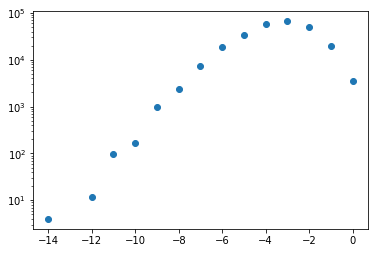

In [22]:
plt.plot([E for E, G in d.items()], [G for E, G in d.items()], 'o')
plt.yscale("log")
plt.show()

In [ ]:
[x for x in range()]